In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicides-in-india/Suicides in India 2001-2012.csv


# Importing the dataset

In [2]:
suicide_data=pd.read_csv("/kaggle/input/suicides-in-india/Suicides in India 2001-2012.csv")

In [3]:
suicide_data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [4]:
suicide_data["State"].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

# Checking missing values

<AxesSubplot:>

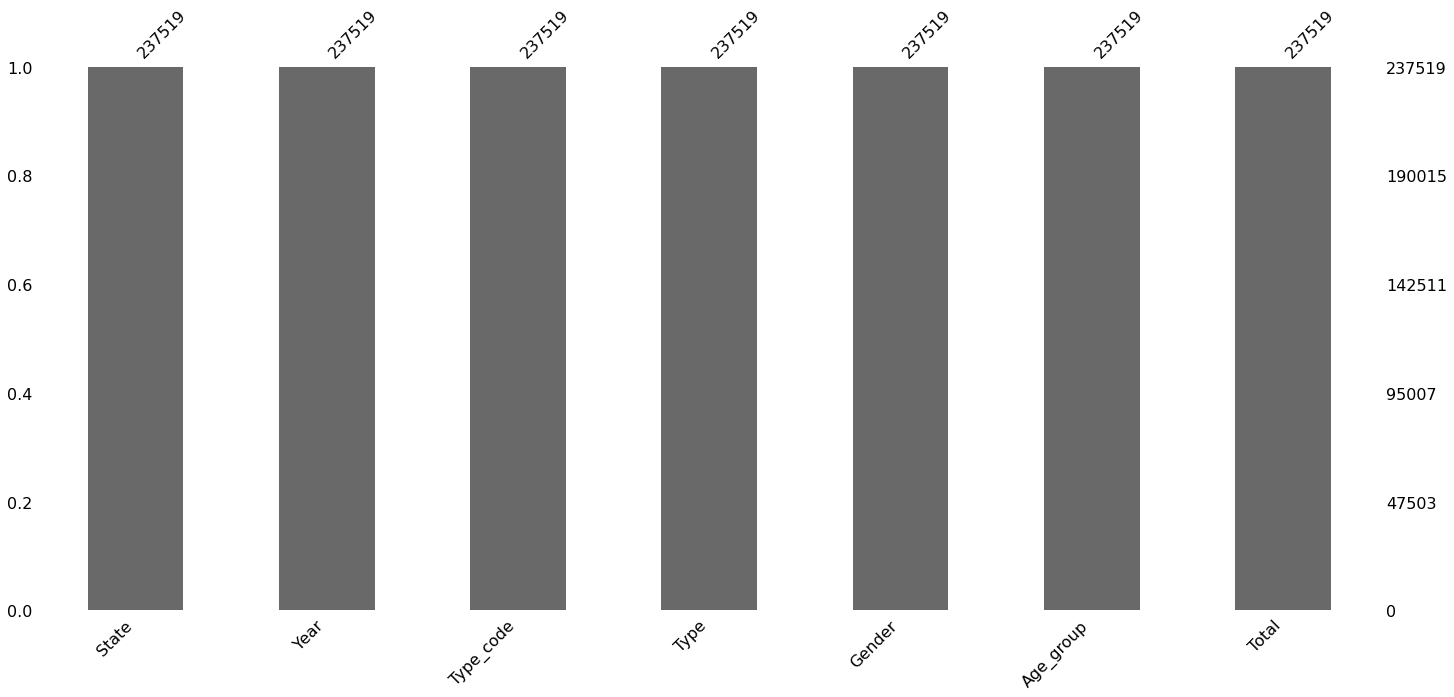

In [5]:
import missingno as msno
msno.bar(suicide_data)

In [6]:
grp = suicide_data.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)
total_suicides = total_suicides[2:]

# The total number of suicides per state in descending order

In [7]:
total_suicides

,State,Total
20,Maharashtra,901945
37,West Bengal,849936
30,Tamil Nadu,818691
1,Andhra Pradesh,814059
16,Karnataka,734825
17,Kerala,538946
19,Madhya Pradesh,451535
11,Gujarat,330858
6,Chhattisgarh,302354
25,Odisha,267234


[Text(0, 0, 'Maharashtra'),
 Text(1, 0, 'West Bengal'),
 Text(2, 0, 'Tamil Nadu'),
 Text(3, 0, 'Andhra Pradesh'),
 Text(4, 0, 'Karnataka'),
 Text(5, 0, 'Kerala'),
 Text(6, 0, 'Madhya Pradesh'),
 Text(7, 0, 'Gujarat'),
 Text(8, 0, 'Chhattisgarh'),
 Text(9, 0, 'Odisha'),
 Text(10, 0, 'Rajasthan'),
 Text(11, 0, 'Uttar Pradesh'),
 Text(12, 0, 'Assam'),
 Text(13, 0, 'Haryana'),
 Text(14, 0, 'Delhi (Ut)'),
 Text(15, 0, 'Total (Uts)'),
 Text(16, 0, 'Jharkhand'),
 Text(17, 0, 'Punjab'),
 Text(18, 0, 'Bihar'),
 Text(19, 0, 'Tripura'),
 Text(20, 0, 'Puducherry'),
 Text(21, 0, 'Himachal Pradesh'),
 Text(22, 0, 'Uttarakhand'),
 Text(23, 0, 'Goa'),
 Text(24, 0, 'Jammu & Kashmir'),
 Text(25, 0, 'Sikkim'),
 Text(26, 0, 'A & N Islands'),
 Text(27, 0, 'Arunachal Pradesh'),
 Text(28, 0, 'Meghalaya'),
 Text(29, 0, 'Chandigarh'),
 Text(30, 0, 'Mizoram'),
 Text(31, 0, 'D & N Haveli'),
 Text(32, 0, 'Manipur'),
 Text(33, 0, 'Nagaland'),
 Text(34, 0, 'Daman & Diu'),
 Text(35, 0, 'Lakshadweep')]

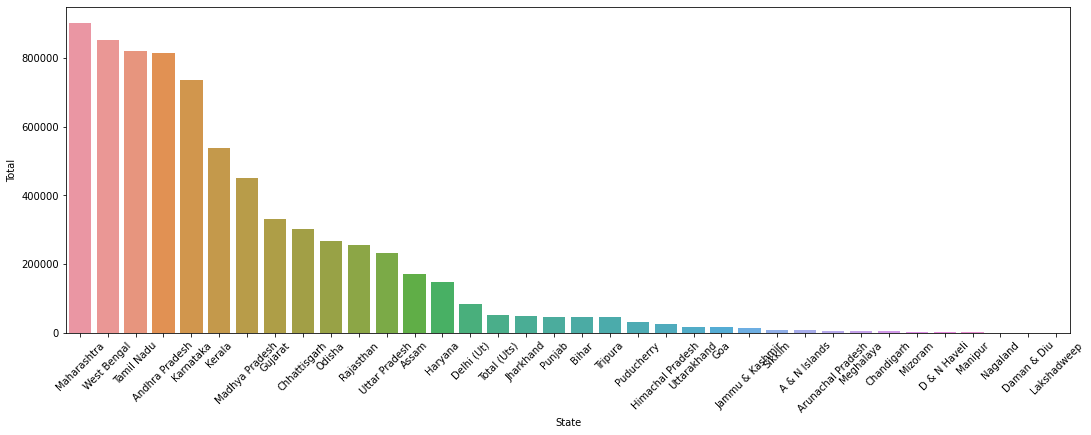

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(figsize=(18,6))
g=sns.barplot(x='State',y='Total',data=total_suicides)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

Female    118640
Male      118879
Name: Gender, dtype: int64


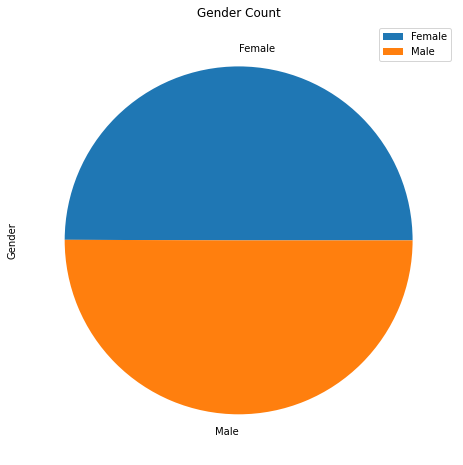

In [9]:
counts = suicide_data['Gender'].value_counts().sort_index()
print(counts)
# Plot a pie chart
counts.plot(kind='pie', title='Gender Count',figsize=(10,8))

plt.legend()
plt.show()

In [10]:
suicide_data["Type_code"].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [11]:
cause = suicide_data[suicide_data['Type_code'] == 'Causes']
edu_status = suicide_data[suicide_data['Type_code'] == 'Education_Status']
means_adpt = suicide_data[suicide_data['Type_code'] == 'Means_adopted']
prof = suicide_data[suicide_data['Type_code'] == 'Professional_Profile']
soc_status = suicide_data[suicide_data['Type_code'] == 'Social_Status']

In [12]:
def plot_type(data, Title, X_lab):
    p_type = data.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2')  

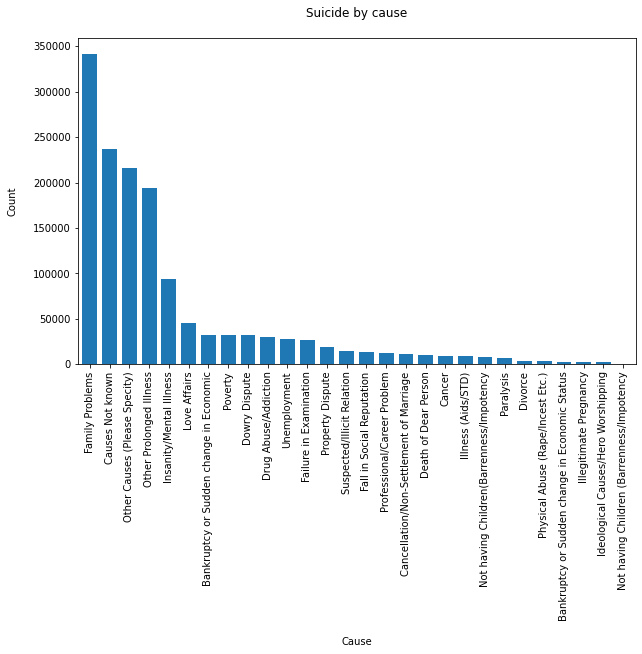

In [13]:
plot_type(cause, 'Suicide by cause', 'Cause')

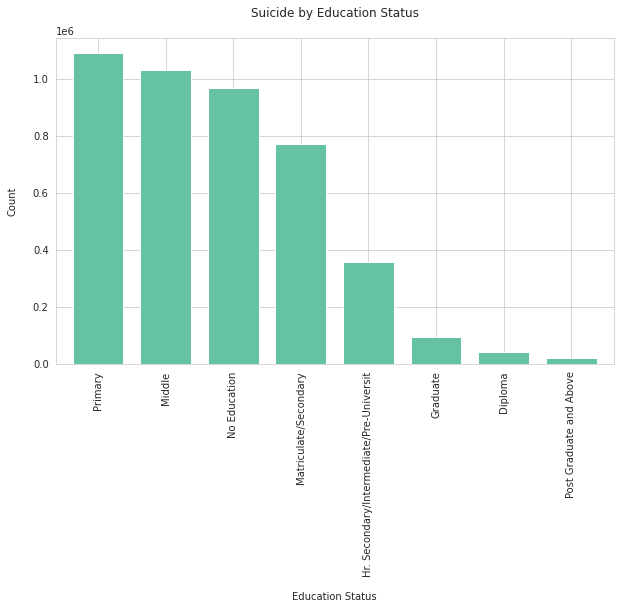

In [14]:
#plot by the educational causes
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

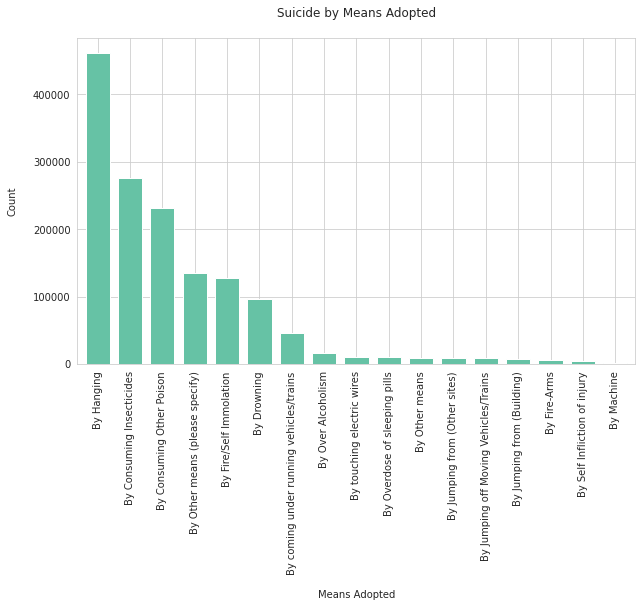

In [15]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

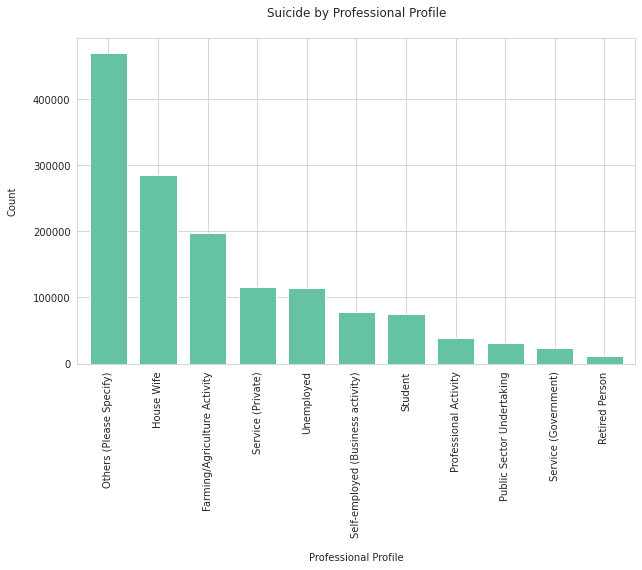

In [16]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

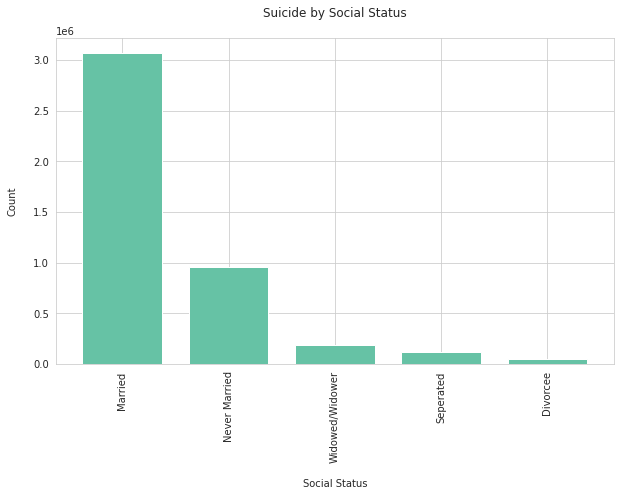

In [17]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status')

In [18]:
#which age group commits more suicide
age_grp = suicide_data.groupby('Age_group')['Total'].sum()
age = pd.DataFrame(age_grp).reset_index()
age = age[1:]
age


,Age_group,Total
1,0-14,98410
2,15-29,1534037
3,30-44,1471599
4,45-59,885177
5,60+,346925


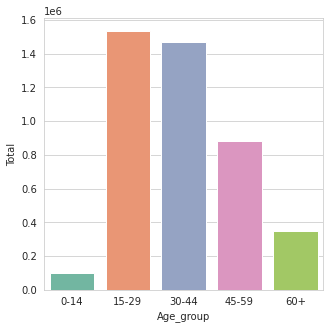

In [19]:
plt.subplots(figsize=(5,5))
g = sns.barplot(x='Age_group',y='Total',data=age)

In [20]:
x = suicide_data.groupby(['State','Year'])['Total'].sum()
y = pd.DataFrame(x).reset_index()
y = y.pivot(index='State',columns='Year')
y['sum'] = y.sum(axis=1)
yearly_total = y.sum(axis=0)
y = y.sort_values('sum',ascending=False)
y = y[2:14]
y = y/10
y = y.drop('sum',axis=1)
y

Total                                                  \
Year              2001    2002    2003    2004    2005    2006    2007   
State                                                                    
Maharashtra     7309.0  7264.5  7380.0  7364.5  7213.0  7747.0  7592.0   
West Bengal     6845.0  6503.5  6640.0  6703.5  7507.5  7862.5  7430.0   
Tamil Nadu      5645.0  5613.4  5936.0  6419.5  6038.0  6190.5  6905.5   
Andhra Pradesh  5261.0  5846.5  5704.5  6763.0  6721.0  6638.0  7441.0   
Karnataka       5940.5  6135.0  6180.5  5968.5  5778.5  6106.0  6152.0   
Kerala          4786.0  4905.0  4719.0  4526.5  4622.0  4513.0  4481.0   
Madhya Pradesh  3430.0  3449.5  3381.0  3397.5  2724.0  3217.5  3164.5   
Gujarat         2395.5  2321.6  2283.0  2386.8  2382.5  2517.2  2790.0   
Chhattisgarh    2005.1  1975.0  1959.5  2247.5  2440.5  2313.0  2419.5   
Odisha          2025.4  2194.0  2210.0  2107.5  2104.0  2032.5  2154.0   
Rajasthan       1597.5  1624.0  1830.5  1862.5  2088.9  2131.5  2218.5   
Uttar Pradesh   1758.0  2125.0  1831.5  1818.5  1724.5  1549.5  1961.0   

                                                        
Year              2008    2009    2010    2011    2012  
State                                                   
Maharashtra     7187.0  7150.0  7958.0  7973.5  8056.0  
West Bengal     7426.0  7324.0  8018.5  8246.0  4487.1  
Tamil Nadu      7212.5  7183.2  8280.5  7981.5  8463.5  
Andhra Pradesh  7172.9  7250.0  7950.5  7538.5  7119.0  
Karnataka       6111.0  6097.5  6325.5  6311.0  6376.5  
Kerala          4284.5  4377.5  4293.0  4142.1  4245.0  
Madhya Pradesh  3814.5  4556.5  4501.5  4629.5  4887.5  
Gujarat         3081.8  3077.9  3103.5  3191.0  3555.0  
Chhattisgarh    2472.5  2941.5  3256.3  3378.0  2827.0  
Odisha          2452.0  2182.5  2127.5  2620.5  2513.5  
Rajasthan       2583.0  2532.5  2460.0  2174.0  2410.5  
Uttar Pradesh   2044.0  2079.0  1814.0  2419.5  2210.7

<AxesSubplot:xlabel='Year', ylabel='No of suicides'>

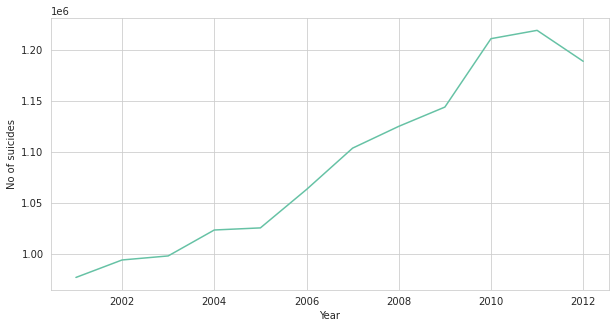

In [21]:
#plot of yearly suicide in india
yearly = pd.DataFrame(yearly_total).reset_index()[:-1].drop('level_0',axis=1)
yearly.columns = ['Year','No of suicides']
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='No of suicides',data=yearly)

In [22]:
#Splitting the data as per the State
State1 = suicide_data[suicide_data['State']=='Maharashtra']
State2 = suicide_data[suicide_data['State']=='West Bengal']
State3 = suicide_data[suicide_data['State']=='Tamil Nadu']

In [23]:
State1

,State,Year,Type_code,Type,Gender,Age_group,Total
135190,Maharashtra,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
135191,Maharashtra,2001,Causes,Drug Abuse/Addiction,Female,0-14,0
135192,Maharashtra,2001,Causes,Fall in Social Reputation,Female,0-14,0
135193,Maharashtra,2001,Causes,Insanity/Mental Illness,Female,0-14,12
135194,Maharashtra,2001,Causes,Divorce,Female,0-14,0
...,...,...,...,...,...,...,...
141977,Maharashtra,2012,Social_Status,Seperated,Male,0-100+,30
141978,Maharashtra,2012,Social_Status,Never Married,Male,0-100+,2261
141979,Maharashtra,2012,Social_Status,Divorcee,Male,0-100+,29
141980,Maharashtra,2012,Social_Status,Married,Male,0-100+,8756


In [24]:
State1["Age_group"].value_counts().index

Index(['60+', '0-14', '30-44', '45-59', '15-29', '0-100+'], dtype='object')

In [25]:
def plot_for_State_by_age(data):
    plt.figure(figsize=(12,6))
    data = suicide_data[['Age_group','Gender','Total']]
    edSort = data.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Age_group',y='Total',hue='Gender',data=edSort,palette='RdBu')

# **No of suicides as per age group in males and females in Maharashtra**

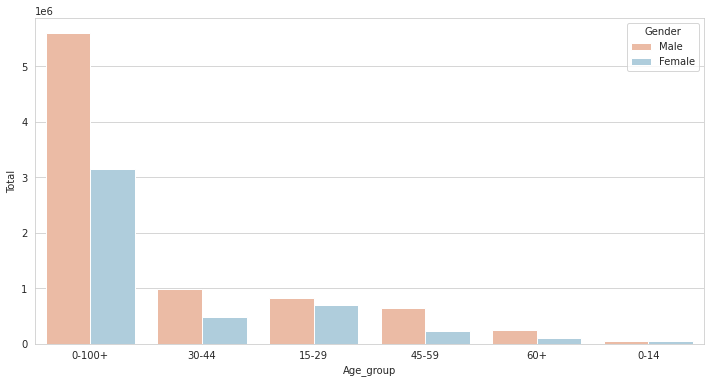

In [26]:
#plotting as per the age_group
plot_for_State_by_age(State1)

# **No of suicides as per age group in males and females in West Bengal**

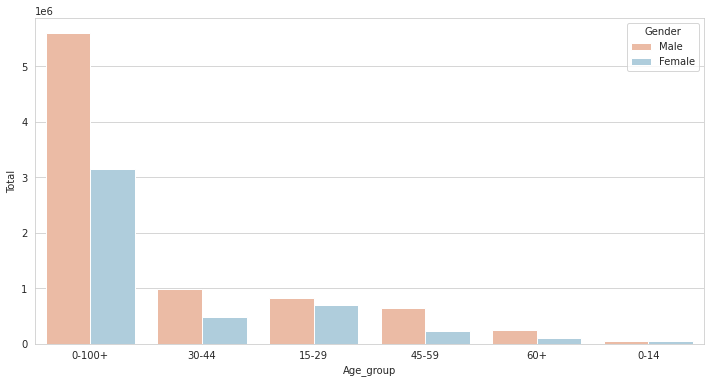

In [27]:
#plotting as per the age_group
plot_for_State_by_age(State2)

# **No of suicides as per age group in males and females in Tamil Nadu**

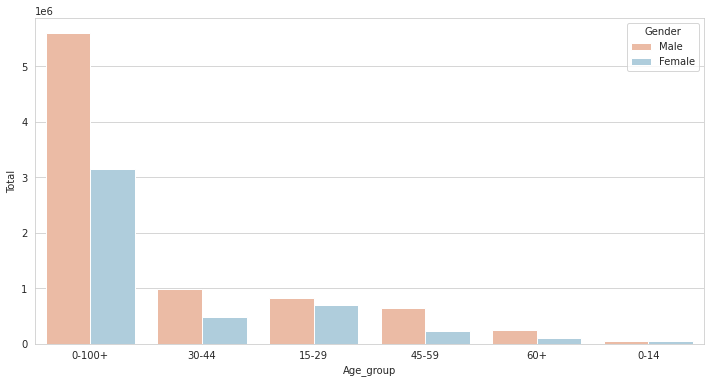

In [28]:
#plotting as per the age_group
plot_for_State_by_age(State3)

# **What is the Social Issue Causing Suicides?**

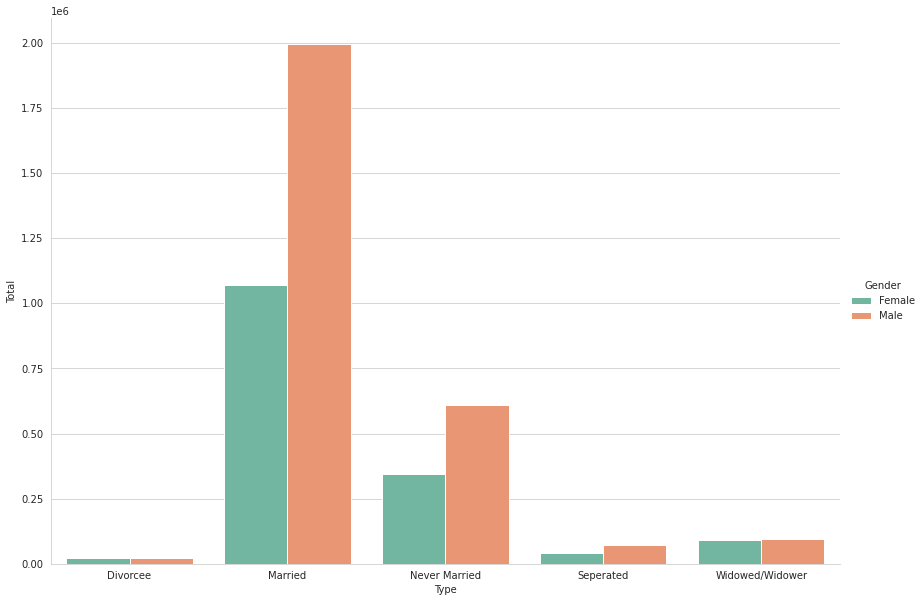

In [29]:
filter_social_status = pd.DataFrame(suicide_data[suicide_data["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);

# **What was the Education Status of people commiting suicides?**

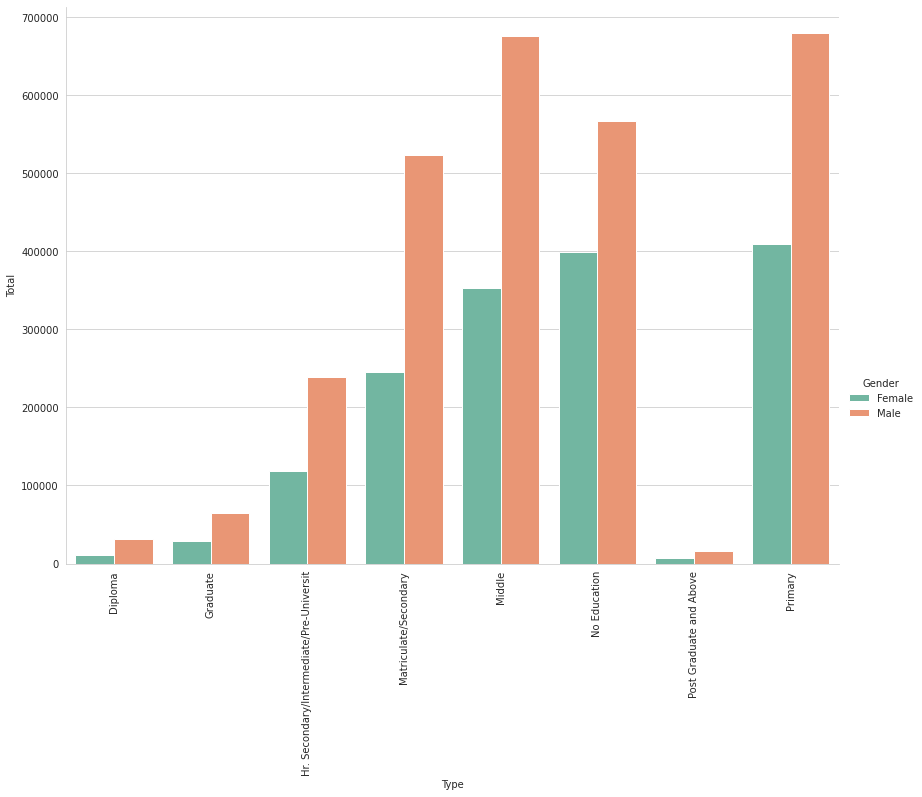

In [30]:
filter_social_status = pd.DataFrame(suicide_data[suicide_data["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)

# **What was the profession of the people who committed suicides?**

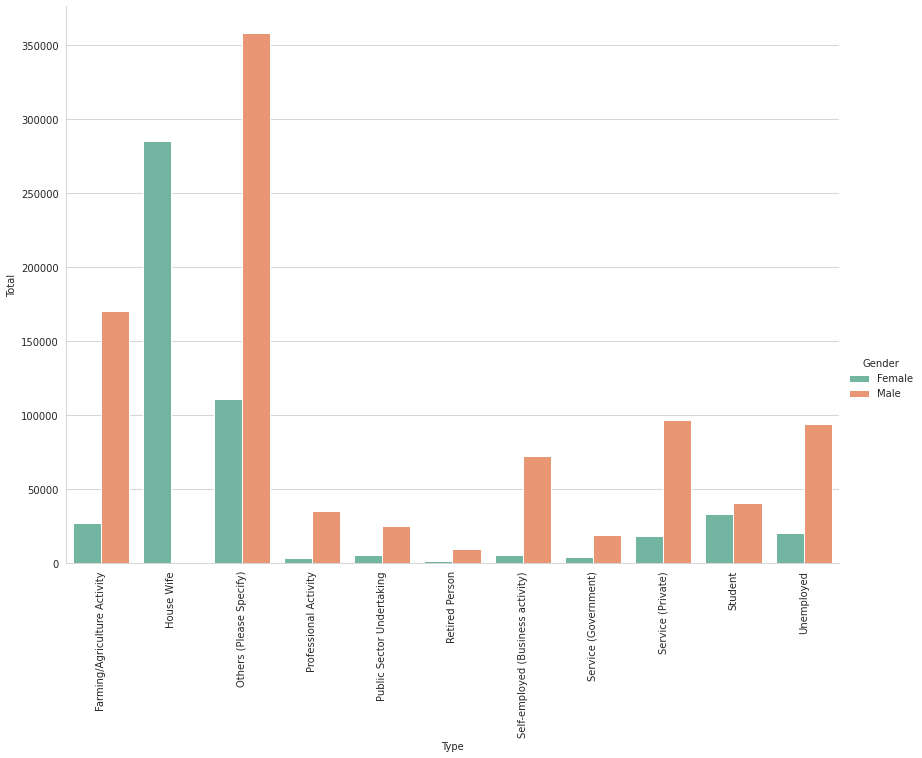

In [31]:
filter_social_status = pd.DataFrame(suicide_data[suicide_data["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)

# Conclusion

* Males tend to commit more suicides compared to Females in India
* Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.
* Male might commit more suicide compared to females in the future if this trend continues.
* People who commit suicide are mostly-
* Married
* Farmers and housewives
* Youngsters (15-29 age) and middle age (30-44)